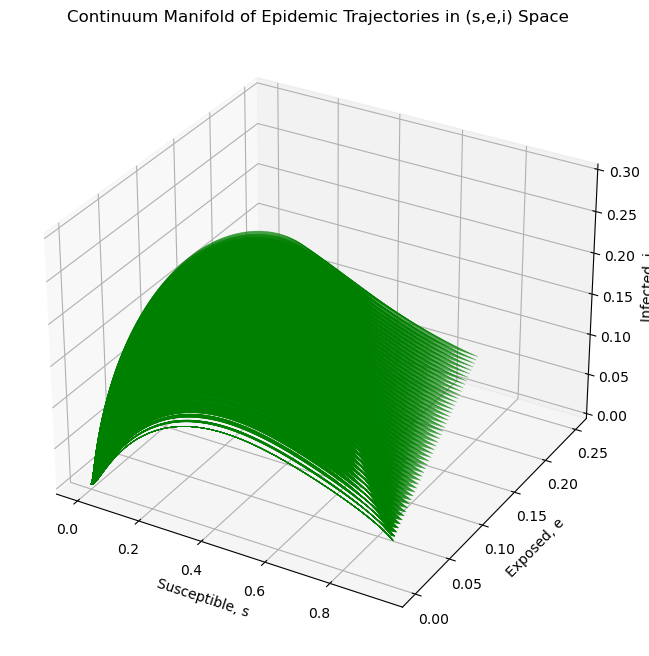

In [2]:
# This code is designed to run in SageMathCell (https://sagecell.sagemath.org/)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from scipy.integrate import solve_ivp

# Model parameters for the controlled SEIR system
beta   = 0.5       # Baseline transmission rate
sigma  = 0.2       # Rate from exposed to infected
gamma  = 0.1       # Recovery rate
h_const = 0.2   2   # Hospitalization control (assumed constant)
u_const = 0.05     # Vaccination control (assumed constant)

# Define the controlled SEIR ODE system
def controlled_seir(t, y):
    s, e, i, r = y
    dsdt = -(((beta - h_const) * s * i) + u_const * s)
    dedt = ((beta - h_const) * s * i) - sigma * e
    didt = sigma * e - gamma * i
    drdt = gamma * i + u_const * s
    return [dsdt, dedt, didt, drdt]

# Time span for simulation
t_span = (0, 160)
t_eval = np.linspace(t_span[0], t_span[1], 800)

# Generate a dense continuum of initial conditions.
# We vary s0 and e0 so that s0 + e0 < 1 (with i0 = 1 - s0 - e0, r0 = 0).
# The union of the trajectories for all these initial conditions approximates the continuum manifold.
N = 50  # Use a high resolution grid
s0_vals = np.linspace(0.70, 0.95, N)
trajectories = []

for s0 in s0_vals:
    # For each s0, choose e0 such that s0 + e0 < 0.95 (to guarantee i0 > 0.05)
    e0_max = 0.95 - s0
    e0_vals = np.linspace(0, e0_max, N)
    for e0 in e0_vals:
        i0 = 1 - s0 - e0
        if i0 < 0.05:
            continue
        y0 = [s0, e0, i0, 0.0]
        sol = solve_ivp(controlled_seir, t_span, y0, t_eval=t_eval, method='RK45')
        s_traj, e_traj, i_traj, r_traj = sol.y
        trajectories.append((s_traj, e_traj, i_traj))

# Plot the union of trajectories as a continuum manifold in (s,e,i) space.
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for s_traj, e_traj, i_traj in trajectories:
    ax.plot(s_traj, e_traj, i_traj, lw=0.5, alpha=0.6, color='green')

ax.set_xlabel('Susceptible, s')
ax.set_ylabel('Exposed, e')
ax.set_zlabel('Infected, i')
ax.set_title('Continuum Manifold of Epidemic Trajectories in (s,e,i) Space')
plt.show()


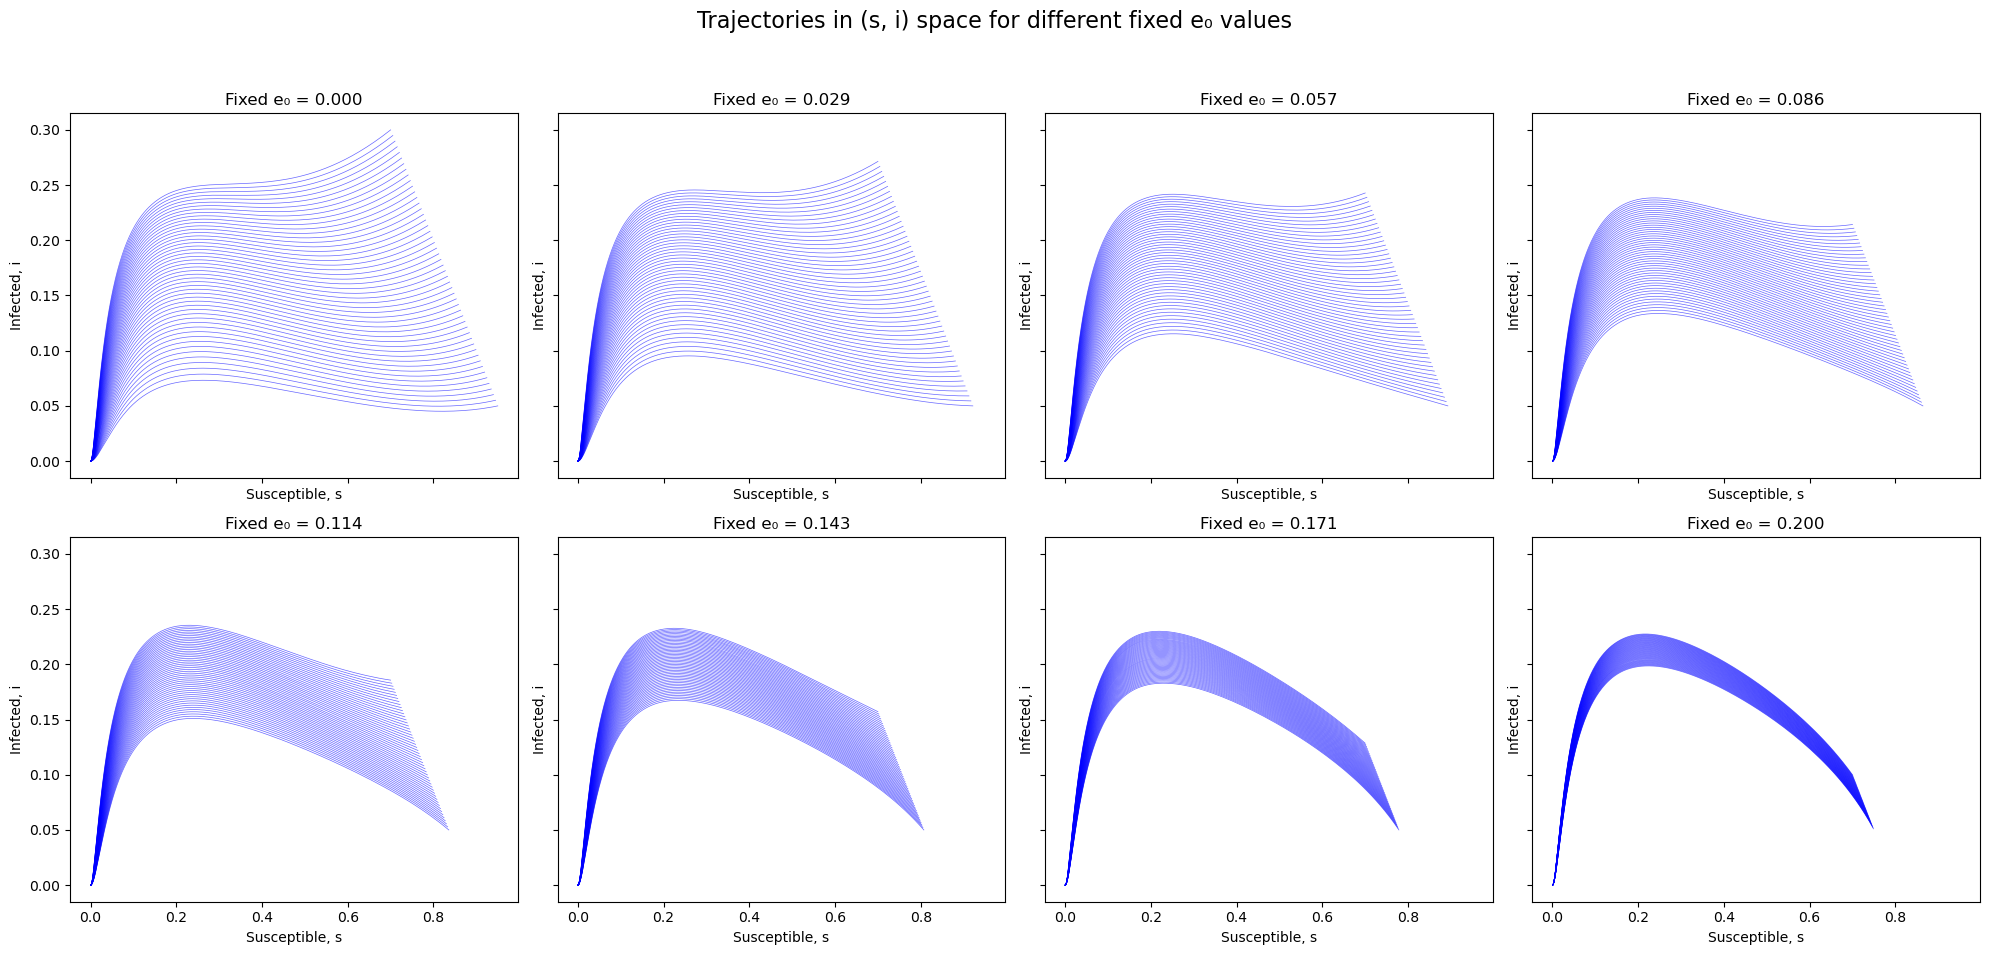

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Model parameters for the controlled SEIR system
beta    = 0.5   # Baseline transmission rate
sigma   = 0.2   # Rate from exposed to infected
gamma   = 0.1   # Recovery rate
h_const = 0.2   # Hospitalization control (assumed constant)
u_const = 0.05  # Vaccination control (assumed constant)

# Define the controlled SEIR ODE system
def controlled_seir(t, y):
    s, e, i, r = y
    dsdt = -(((beta - h_const) * s * i) + u_const * s)
    dedt = ((beta - h_const) * s * i) - sigma * e
    didt = sigma * e - gamma * i
    drdt = gamma * i + u_const * s
    return [dsdt, dedt, didt, drdt]

# Time span for simulation
t_span = (0, 160)
t_eval = np.linspace(t_span[0], t_span[1], 800)

# Define 8 fixed values for the initial exposed fraction e0
# (Choose values so that s0 can vary meaningfully: we require s0 <= 0.95-e0 and s0 >= 0.70)
fixed_e_values = np.linspace(0, 0.2, 8)

N = 50  # Resolution for s0 values

# Create a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=True)
axes = axes.flatten()

for idx, e_fixed in enumerate(fixed_e_values):
    ax = axes[idx]
    # Determine the range for s0:
    # We choose s0 in [0.70, 0.95-e_fixed] so that i0 = 1-s0-e_fixed >= 0.05.
    s0_max = 0.95 - e_fixed
    if s0_max <= 0.70:
        continue  # Skip if there is no valid range for s0.
    s0_vals = np.linspace(0.70, s0_max, N)
    # For each s0 in this range, compute i0 and simulate the ODE system
    for s0 in s0_vals:
        i0 = 1 - s0 - e_fixed
        if i0 < 0.05:
            continue  # Ensure the initial infected proportion is not too small.
        y0 = [s0, e_fixed, i0, 0.0]
        sol = solve_ivp(controlled_seir, t_span, y0, t_eval=t_eval, method='RK45')
        s_traj = sol.y[0]
        i_traj = sol.y[2]
        ax.plot(s_traj, i_traj, lw=0.5, alpha=0.6, color='blue')
    ax.set_title(f"Fixed e₀ = {e_fixed:.3f}")
    ax.set_xlabel("Susceptible, s")
    ax.set_ylabel("Infected, i")

plt.suptitle("Trajectories in (s, i) space for different fixed e₀ values", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


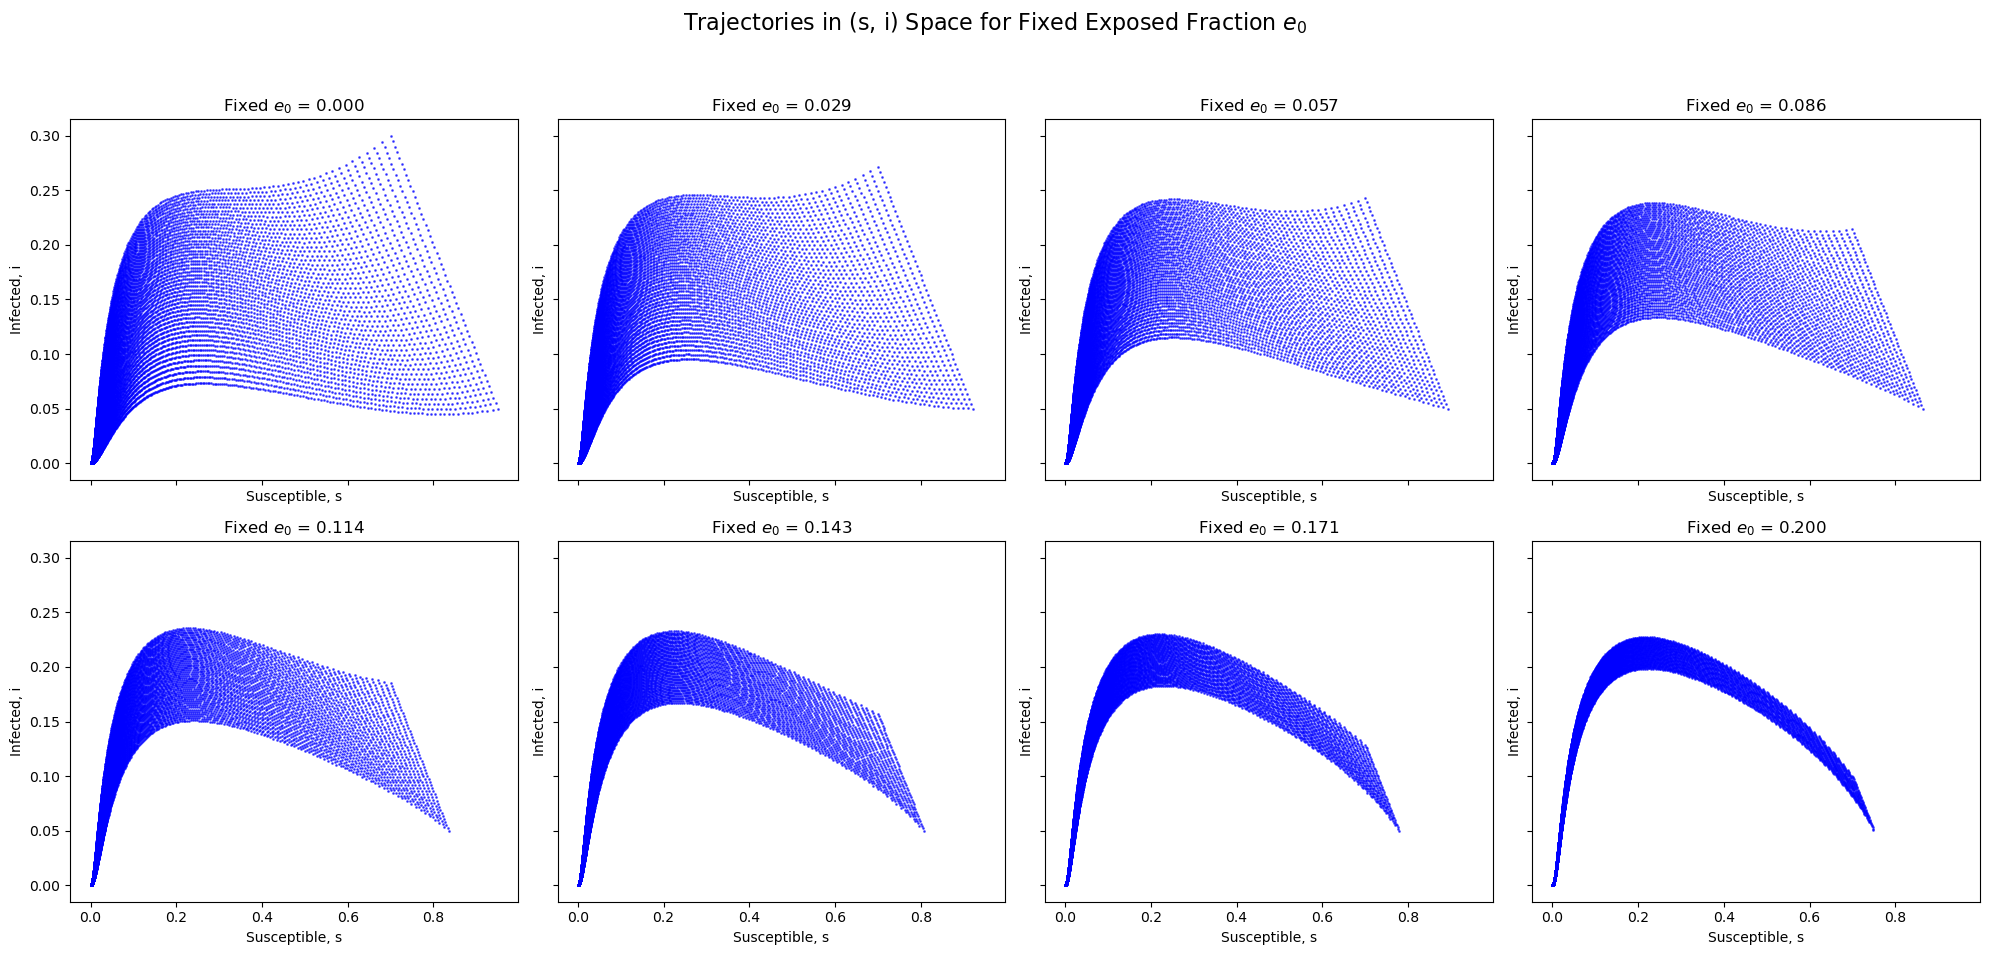

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Model parameters for the controlled SEIR system
beta    = 0.5    # Baseline transmission rate
sigma   = 0.2    # Rate from exposed to infected
gamma   = 0.1    # Recovery rate
h_const = 0.2    # Constant hospitalization control
u_const = 0.05   # Constant vaccination control

# Define the controlled SEIR ODE system
def controlled_seir(t, y):
    s, e, i, r = y
    dsdt = -(((beta - h_const) * s * i) + u_const * s)
    dedt = ((beta - h_const) * s * i) - sigma * e
    didt = sigma * e - gamma * i
    drdt = gamma * i + u_const * s
    return [dsdt, dedt, didt, drdt]

# Time span for simulation
t_span = (0, 160)
t_eval = np.linspace(t_span[0], t_span[1], 800)

# Define 8 fixed values for the initial exposed fraction e0.
# Here we choose 8 values between 0 and 0.2.
fixed_e_values = np.linspace(0, 0.2, 8)

# Set resolution for s0 values
N = 50

# Create a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=True)
axes = axes.flatten()

# Loop over the fixed e0 values and vary s0
for idx, e_fixed in enumerate(fixed_e_values):
    ax = axes[idx]
    # Choose s0 in the range [0.70, 0.95 - e_fixed] so that i0 = 1 - s0 - e_fixed >= 0.05
    s0_max = 0.95 - e_fixed
    if s0_max <= 0.70:
        continue  # Skip if there is no valid range for s0
    s0_vals = np.linspace(0.70, s0_max, N)
    
    # Collect all (s, i) points for the given fixed e_fixed
    s_points = []
    i_points = []
    
    for s0 in s0_vals:
        i0 = 1 - s0 - e_fixed
        if i0 < 0.05:
            continue  # Ensure the initial infected proportion is sufficiently high
        y0 = [s0, e_fixed, i0, 0.0]
        sol = solve_ivp(controlled_seir, t_span, y0, t_eval=t_eval, method='RK45')
        s_traj = sol.y[0]
        i_traj = sol.y[2]
        s_points.extend(s_traj)
        i_points.extend(i_traj)
    
    # Plot the collected points as a scatter plot
    ax.scatter(s_points, i_points, s=1, color='blue', alpha=0.6)
    ax.set_title(f"Fixed $e_0$ = {e_fixed:.3f}")
    ax.set_xlabel("Susceptible, s")
    ax.set_ylabel("Infected, i")

plt.suptitle("Trajectories in (s, i) Space for Fixed Exposed Fraction $e_0$", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


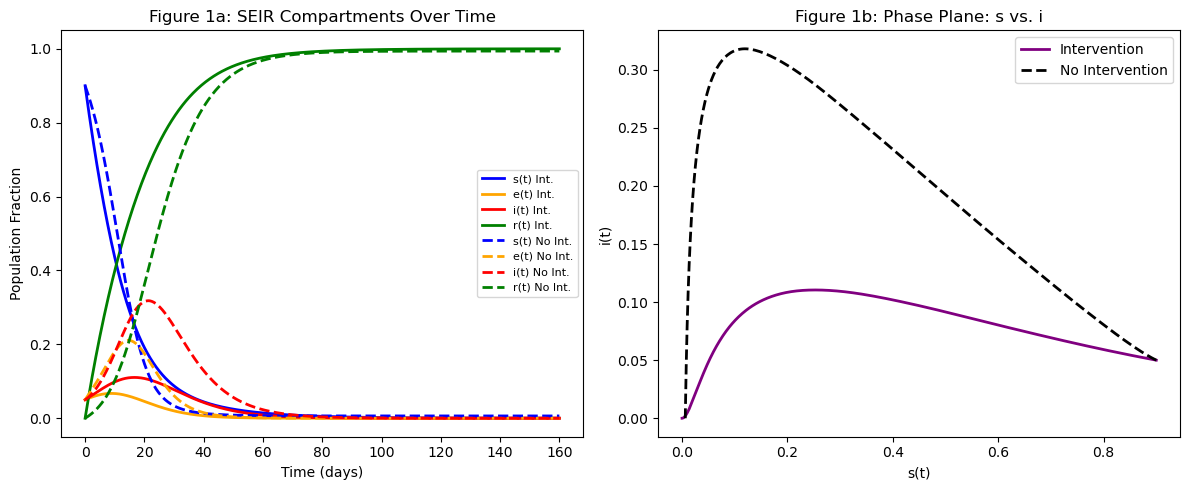

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# -----------------------------------------------------------------------------
# Model Parameters
# -----------------------------------------------------------------------------
beta    = 0.5    # Baseline transmission rate
sigma   = 0.2    # Rate from exposed to infected
gamma   = 0.1    # Recovery rate
h_const = 0.2    # Constant hospitalization control (intervention)
u_const = 0.05   # Constant vaccination control (intervention)

# -----------------------------------------------------------------------------
# ODE for the controlled SEIR system (with intervention)
# -----------------------------------------------------------------------------
def controlled_seir(t, y):
    s, e, i, r = y
    dsdt = -(((beta - h_const) * s * i) + u_const * s)
    dedt = ((beta - h_const) * s * i) - sigma * e
    didt = sigma * e - gamma * i
    drdt = gamma * i + u_const * s
    return [dsdt, dedt, didt, drdt]

# -----------------------------------------------------------------------------
# ODE for the SEIR system with NO intervention (h = 0, u = 0)
# -----------------------------------------------------------------------------
def controlled_seir_no_intervention(t, y):
    s, e, i, r = y
    dsdt = - (beta * s * i)       # No hospitalization or vaccination control
    dedt = (beta * s * i) - sigma * e
    didt = sigma * e - gamma * i
    drdt = gamma * i              # Only recovery contributes
    return [dsdt, dedt, didt, drdt]

# -----------------------------------------------------------------------------
# Fixed Initial Conditions
# -----------------------------------------------------------------------------
# s0 = 0.90, e0 = 0.05, i0 = 0.05, r0 = 0.00 (population fractions sum to 1)
s0 = 0.90
e0 = 0.05
i0 = 0.05
r0 = 0.00
y0 = [s0, e0, i0, r0]

# -----------------------------------------------------------------------------
# Time Span for Simulation
# -----------------------------------------------------------------------------
t_span = (0, 160)
t_eval = np.linspace(t_span[0], t_span[1], 800)

# -----------------------------------------------------------------------------
# Solve the ODE for Intervention Scenario
# -----------------------------------------------------------------------------
sol_int = solve_ivp(controlled_seir, t_span, y0, t_eval=t_eval, method='RK45')
t_int = sol_int.t
s_int = sol_int.y[0]
e_int = sol_int.y[1]
i_int = sol_int.y[2]
r_int = sol_int.y[3]

# -----------------------------------------------------------------------------
# Solve the ODE for No-Intervention Scenario
# -----------------------------------------------------------------------------
sol_no = solve_ivp(controlled_seir_no_intervention, t_span, y0, t_eval=t_eval, method='RK45')
t_no = sol_no.t
s_no = sol_no.y[0]
e_no = sol_no.y[1]
i_no = sol_no.y[2]
r_no = sol_no.y[3]

# -----------------------------------------------------------------------------
# Plotting the Results
# -----------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1) Time Series Plot (Figure 1a)
# Solid lines: Intervention; Dashed lines: No intervention.
axes[0].plot(t_int, s_int, label='s(t) Int.', lw=2, color='blue')
axes[0].plot(t_int, e_int, label='e(t) Int.', lw=2, color='orange')
axes[0].plot(t_int, i_int, label='i(t) Int.', lw=2, color='red')
axes[0].plot(t_int, r_int, label='r(t) Int.', lw=2, color='green')
axes[0].plot(t_no, s_no, '--', label='s(t) No Int.', lw=2, color='blue')
axes[0].plot(t_no, e_no, '--', label='e(t) No Int.', lw=2, color='orange')
axes[0].plot(t_no, i_no, '--', label='i(t) No Int.', lw=2, color='red')
axes[0].plot(t_no, r_no, '--', label='r(t) No Int.', lw=2, color='green')
axes[0].set_xlabel("Time (days)")
axes[0].set_ylabel("Population Fraction")
axes[0].set_title("Figure 1a: SEIR Compartments Over Time")
axes[0].legend(loc='best', fontsize=8)

# 2) Phase-Plane Plot: s(t) vs. i(t) (Figure 1b)
axes[1].plot(s_int, i_int, lw=2, color='purple', label='Intervention')
axes[1].plot(s_no, i_no, '--', lw=2, color='black', label='No Intervention')
axes[1].set_xlabel("s(t)")
axes[1].set_ylabel("i(t)")
axes[1].set_title("Figure 1b: Phase Plane: s vs. i")
axes[1].legend(loc='best', fontsize=10)

plt.tight_layout()
plt.show()


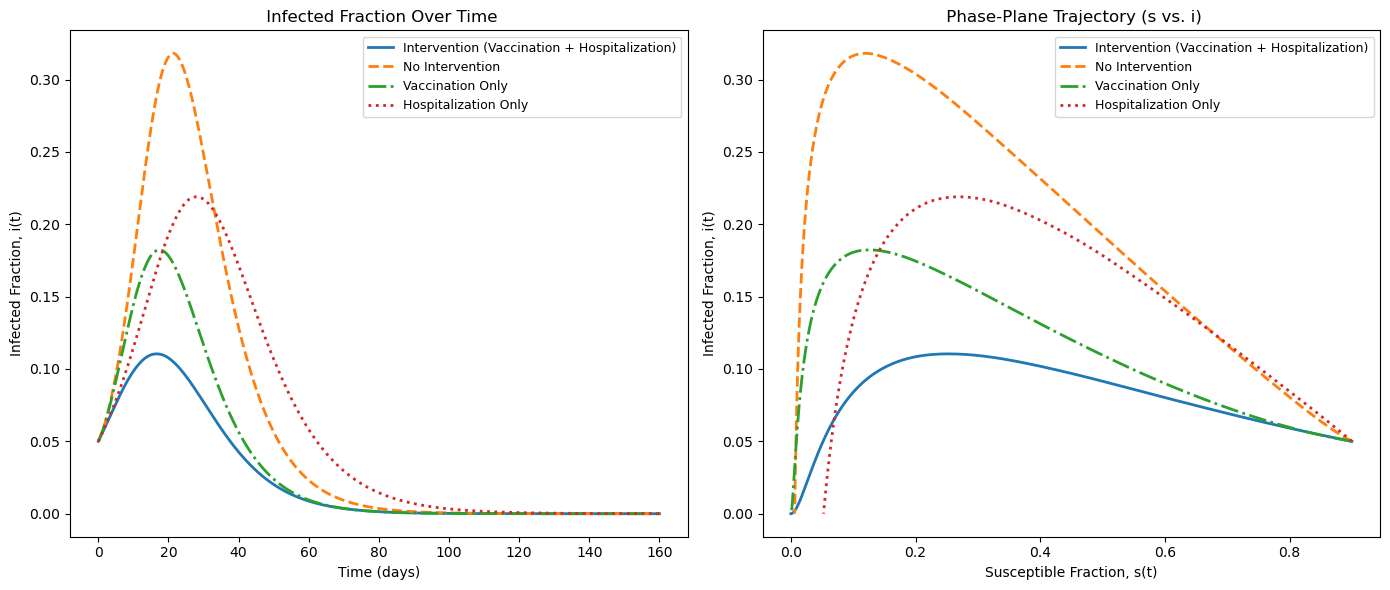

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# -----------------------------------------------------------------------------
# Model Parameters
# -----------------------------------------------------------------------------
beta    = 0.5    # Baseline transmission rate
sigma   = 0.2    # Rate from exposed to infected
gamma   = 0.1    # Recovery rate

# -----------------------------------------------------------------------------
# SEIR ODE with controls as parameters (h: hospitalization, u: vaccination)
# -----------------------------------------------------------------------------
def seir_system(t, y, h, u):
    s, e, i, r = y
    dsdt = -(((beta - h) * s * i) + u * s)
    dedt = ((beta - h) * s * i) - sigma * e
    didt = sigma * e - gamma * i
    drdt = gamma * i + u * s
    return [dsdt, dedt, didt, drdt]

# -----------------------------------------------------------------------------
# Fixed Initial Conditions: s0=0.90, e0=0.05, i0=0.05, r0=0.00 (sum=1)
# -----------------------------------------------------------------------------
y0 = [0.90, 0.05, 0.05, 0.0]

# -----------------------------------------------------------------------------
# Time Span for Simulation
# -----------------------------------------------------------------------------
t_span = (0, 160)
t_eval = np.linspace(t_span[0], t_span[1], 800)

# -----------------------------------------------------------------------------
# Define Scenarios and Corresponding Control Parameters
# -----------------------------------------------------------------------------
# Each scenario is specified by its hospitalization (h) and vaccination (u) controls.
scenarios = {
    "Intervention (Vaccination + Hospitalization)": {"h": 0.2, "u": 0.05, "linestyle": "-"},
    "No Intervention": {"h": 0.0, "u": 0.0, "linestyle": "--"},
    "Vaccination Only": {"h": 0.0, "u": 0.05, "linestyle": "-."},
    "Hospitalization Only": {"h": 0.2, "u": 0.0, "linestyle": ":"}
}

# -----------------------------------------------------------------------------
# Solve the ODE for Each Scenario
# -----------------------------------------------------------------------------
solutions = {}
for scenario, params in scenarios.items():
    sol = solve_ivp(lambda t, y: seir_system(t, y, params["h"], params["u"]),
                    t_span, y0, t_eval=t_eval, method='RK45')
    solutions[scenario] = sol

# -----------------------------------------------------------------------------
# Plot Results
# -----------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Figure 1a: Time Series Plot (Infected Fraction i(t) Over Time)
for scenario, sol in solutions.items():
    axes[0].plot(sol.t, sol.y[2], label=scenario, 
                 linestyle=scenarios[scenario]["linestyle"], lw=2)
axes[0].set_xlabel("Time (days)")
axes[0].set_ylabel("Infected Fraction, i(t)")
axes[0].set_title(" Infected Fraction Over Time")
axes[0].legend(fontsize=9)

# Figure 1b: Phase-Plane Plot (s(t) vs. i(t))
for scenario, sol in solutions.items():
    axes[1].plot(sol.y[0], sol.y[2], label=scenario, 
                 linestyle=scenarios[scenario]["linestyle"], lw=2)
axes[1].set_xlabel("Susceptible Fraction, s(t)")
axes[1].set_ylabel("Infected Fraction, i(t)")
axes[1].set_title(" Phase-Plane Trajectory (s vs. i)")
axes[1].legend(fontsize=9)

plt.tight_layout()
plt.show()


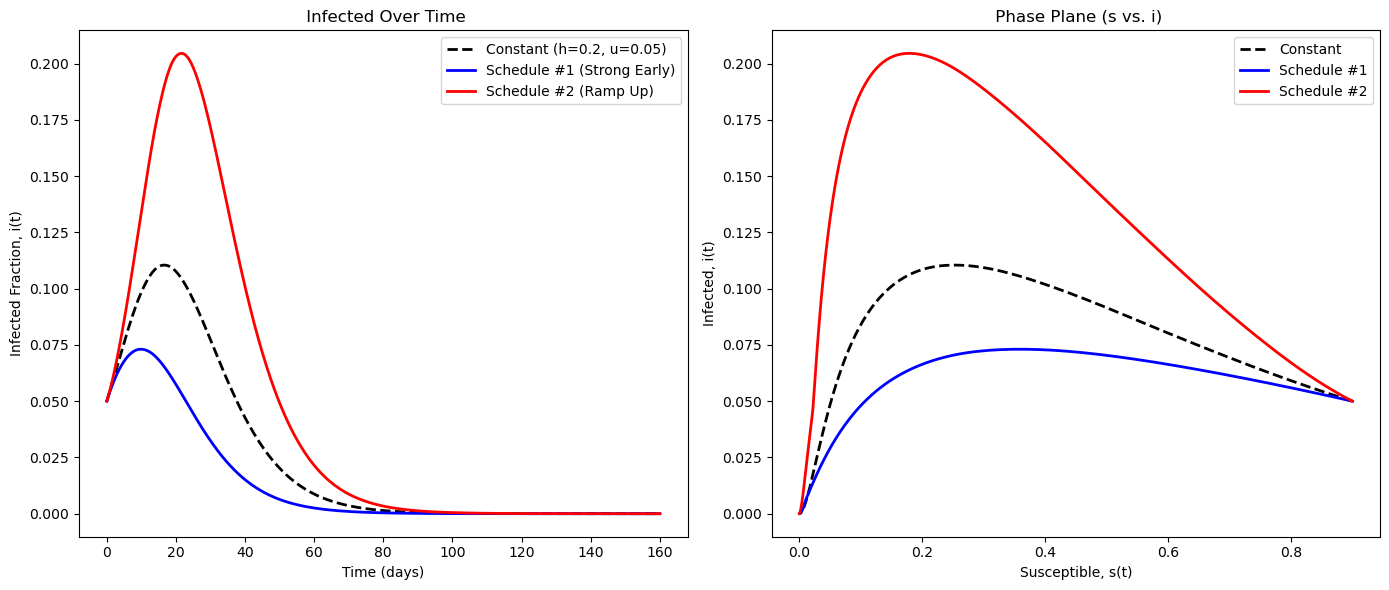

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# -----------------------------------------------------------------------------
# MODEL PARAMETERS
# -----------------------------------------------------------------------------
beta  = 0.5
sigma = 0.2
gamma = 0.1

# -----------------------------------------------------------------------------
# TIME-VARYING CONTROL SCHEDULE #1
# -----------------------------------------------------------------------------
def controls_schedule_1(t):
    """
    Schedule #1: Strong early, then taper.
      0 <= t < 50  : h=0.3, u=0.08
     50 <= t < 100 : h=0.1, u=0.05
     t >= 100      : h=0.0, u=0.0
    """
    if t < 50:
        return 0.3, 0.08
    elif t < 100:
        return 0.1, 0.05
    else:
        return 0.0, 0.0

# -----------------------------------------------------------------------------
# TIME-VARYING CONTROL SCHEDULE #2
# -----------------------------------------------------------------------------
def controls_schedule_2(t):
    """
    Schedule #2: Mild start, ramp up, then maintain moderate controls.
      0 <= t < 50  : h=0.1, u=0.02
     50 <= t < 100 : h=0.2, u=0.06
     t >= 100      : h=0.2, u=0.05
    """
    if t < 50:
        return 0.1, 0.02
    elif t < 100:
        return 0.2, 0.06
    else:
        return 0.2, 0.05

# -----------------------------------------------------------------------------
# SEIR MODEL WITH TIME-VARYING CONTROLS
# -----------------------------------------------------------------------------
def seir_time_varying(t, y, schedule_func):
    s, e, i, r = y
    h, u = schedule_func(t)
    dsdt = -(((beta - h) * s * i) + u * s)
    dedt = ((beta - h) * s * i) - sigma * e
    didt = sigma * e - gamma * i
    drdt = gamma * i + u * s
    return [dsdt, dedt, didt, drdt]

# -----------------------------------------------------------------------------
# SEIR MODEL WITH CONSTANT CONTROLS (h=0.2, u=0.05)
# -----------------------------------------------------------------------------
def seir_constant(t, y):
    s, e, i, r = y
    h = 0.2
    u = 0.05
    dsdt = -(((beta - h) * s * i) + u * s)
    dedt = ((beta - h) * s * i) - sigma * e
    didt = sigma * e - gamma * i
    drdt = gamma * i + u * s
    return [dsdt, dedt, didt, drdt]

# -----------------------------------------------------------------------------
# INITIAL CONDITIONS AND TIME SPAN
# -----------------------------------------------------------------------------
y0 = [0.90, 0.05, 0.05, 0.0]  # s=0.90, e=0.05, i=0.05, r=0.0
t_span = (0, 160)
t_eval = np.linspace(*t_span, 800)

# -----------------------------------------------------------------------------
# SOLVE ODEs FOR THREE SCENARIOS
# -----------------------------------------------------------------------------
sol_const = solve_ivp(seir_constant, t_span, y0, t_eval=t_eval)
sol_sched1 = solve_ivp(lambda t, y: seir_time_varying(t, y, controls_schedule_1),
                       t_span, y0, t_eval=t_eval)
sol_sched2 = solve_ivp(lambda t, y: seir_time_varying(t, y, controls_schedule_2),
                       t_span, y0, t_eval=t_eval)

# Extract solutions
t_c = sol_const.t
s_c, e_c, i_c, r_c = sol_const.y

t_1 = sol_sched1.t
s_1, e_1, i_1, r_1 = sol_sched1.y

t_2 = sol_sched2.t
s_2, e_2, i_2, r_2 = sol_sched2.y

# -----------------------------------------------------------------------------
# PLOT: SIDE-BY-SIDE SUBPLOTS (Figure 2a and Figure 2b)
# -----------------------------------------------------------------------------
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Figure 2a: Infected Fraction Over Time (Left Plot)
axes[0].plot(t_c, i_c, 'k--',  lw=2, label="Constant (h=0.2, u=0.05)")
axes[0].plot(t_1, i_1, 'b',    lw=2, label="Schedule #1 (Strong Early)")
axes[0].plot(t_2, i_2, 'r',    lw=2, label="Schedule #2 (Ramp Up)")
axes[0].set_xlabel("Time (days)")
axes[0].set_ylabel("Infected Fraction, i(t)")
axes[0].set_title(" Infected Over Time")
axes[0].legend()

# Figure 2b: Phase Plane: s vs. i (Right Plot)
axes[1].plot(s_c, i_c, 'k--',  lw=2, label="Constant")
axes[1].plot(s_1, i_1, 'b',    lw=2, label="Schedule #1")
axes[1].plot(s_2, i_2, 'r',    lw=2, label="Schedule #2")
axes[1].set_xlabel("Susceptible, s(t)")
axes[1].set_ylabel("Infected, i(t)")
axes[1].set_title(" Phase Plane (s vs. i)")
axes[1].legend()

plt.tight_layout()
plt.show()


In [18]:
# After solving each scenario:
peak_i_const = np.max(i_c)
peak_i_s1 = np.max(i1)
peak_i_s2 = np.max(i2)

final_size_const = 1.0 - s_c[-1]  # final fraction infected
final_size_s1 = 1.0 - s1[-1]
final_size_s2 = 1.0 - s2[-1]

print("Constant Controls:       Peak I =", peak_i_const, ", Final Size =", final_size_const)
print("Schedule #1 (Strong):    Peak I =", peak_i_s1,    ", Final Size =", final_size_s1)
print("Schedule #2 (Ramp Up):   Peak I =", peak_i_s2,    ", Final Size =", final_size_s2)


Constant Controls:       Peak I = 0.11044252276634964 , Final Size = 0.9999061904411323
Schedule #1 (Strong):    Peak I = 0.07307034306507246 , Final Size = 0.9991714322785726
Schedule #2 (Ramp Up):   Peak I = 0.2045088721214466 , Final Size = 0.9990381935874328


In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product


# Set Seaborn style for consistent, publication-quality plots
sns.set(style='whitegrid', context='talk')

# SEIR model differential equations
def seir_model(y, t, beta, sigma, gamma, u_func, h_func):
    s, e, i, r = y
    u_t = u_func(t)
    h_t = h_func(t)
    dsdt = -(beta - h_t) * s * i - u_t * s
    dedt = (beta - h_t) * s * i - sigma * e
    didt = sigma * e - gamma * i
    drdt = gamma * i + u_t * s
    return [dsdt, dedt, didt, drdt]

# Cost functional J_T
def compute_cost(t, s, i, h_func, u_func, c_H, c_NH, c_V, kappa, I_max, delta):
    h_array = np.array([h_func(t_i) for t_i in t])
    u_array = np.array([u_func(t_i) for t_i in t])
    penalty = kappa * np.maximum(0, i - I_max)**2
    integrand = (c_H * i * h_array + c_NH * i * (1 - h_array) + 
                 c_V * u_array * s + penalty) * np.exp(-delta * t)
    return np.trapz(integrand, t)

# Control functions with delays
def u_control(t, u_max, t_delay_u):
    return u_max if t >= t_delay_u else 0

def h_control(t, h_max, t_delay_h):
    return h_max if t >= t_delay_h else 0

# Run a single simulation
def run_simulation(params, T, y0):
    t = np.linspace(0, T, 1000)
    u_func = lambda t: u_control(t, params['u_max'], params['t_delay_u'])
    h_func = lambda t: h_control(t, params['h_max'], params['t_delay_h'])
    sol = odeint(seir_model, y0, t, args=(params['beta'], params['sigma'], 
                                          params['gamma'], u_func, h_func))
    s, e, i, r = sol.T
    J_T = compute_cost(t, s, i, h_func, u_func, params['c_H'], params['c_NH'], 
                       params['c_V'], params['kappa'], params['I_max'], params['delta'])
    return {
        't': t, 's': s, 'e': e, 'i': i, 'r': r, 'J_T': J_T,
        'peak_i': np.max(i), 's_final': s[-1], 'time_to_peak': t[np.argmax(i)]
    }

# Comprehensive sensitivity analysis over parameter ranges
def comprehensive_sensitivity_analysis(base_params, param_ranges, T, y0):
    param_names = list(param_ranges.keys())
    param_combinations = list(product(*[param_ranges[name] for name in param_names]))
    results = []
    for combo in param_combinations:
        params = base_params.copy()
        params.update(dict(zip(param_names, combo)))
        sim_result = run_simulation(params, T, y0)
        result_dict = {'J_T': sim_result['J_T'], 'peak_i': sim_result['peak_i'], 
                       's_final': sim_result['s_final'], 'time_to_peak': sim_result['time_to_peak']}
        result_dict.update(params)
        results.append(result_dict)
    return pd.DataFrame(results)

# Define parameters
base_params = {
    'beta': 0.5, 'sigma': 0.2, 'gamma': 0.1,
    'u_max': 0.05, 'h_max': 0.2,
    't_delay_u': 0, 't_delay_h': 0,
    'c_H': 2.0, 'c_NH': 1.0, 'c_V': 1.0,
    'kappa': 10.0, 'I_max': 0.1, 'delta': 0.05
}
param_ranges = {
    'beta': np.linspace(0.2, 0.8, 5),
    'u_max': np.linspace(0.01, 0.1, 5),
    'h_max': np.linspace(0.05, 0.4, 5),
    't_delay_u': np.linspace(0, 20, 5),
    't_delay_h': np.linspace(0, 20, 5),
    'c_V': np.linspace(0.2, 3.0, 5),
    'c_H': np.linspace(1.0, 4.0, 5)
}
y0 = [0.90, 0.05, 0.05, 0.0]  # Initial conditions (matches page 15)
T = 150  # Finite horizon

# Run sensitivity analysis
results_df = comprehensive_sensitivity_analysis(base_params, param_ranges, T, y0)


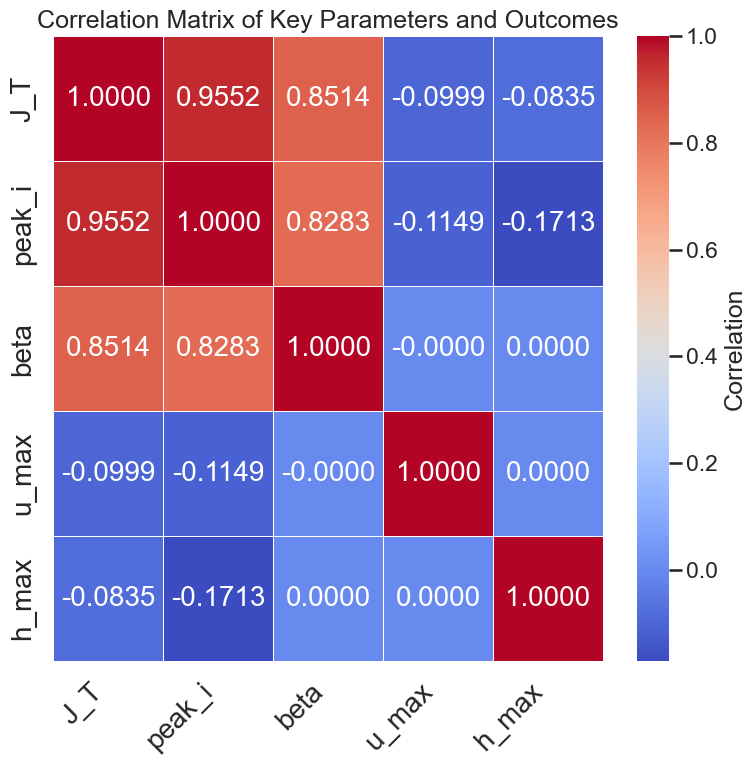

In [2]:


# 1. Correlation Heatmap
plt.figure(figsize=(8, 8))
key_vars = ['J_T', 'peak_i', 'beta', 'u_max', 'h_max']
corr_matrix = results_df[key_vars].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.4f', cmap='coolwarm', linewidths=0.5,
            annot_kws={'size': 20}, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix of Key Parameters and Outcomes')
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style and update font sizes for better readability
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 22,
    'axes.titlesize': 26,
    'axes.labelsize': 22
})

params_to_plot = ['beta', 'u_max', 'h_max', 't_delay_u', 't_delay_h', 'c_V', 'c_H']

# Create a grid of subplots with 4 rows and 2 columns at high resolution
fig, axes = plt.subplots(4, 2, figsize=(30, 30), dpi=300)
axes = axes.flatten()

# Loop through parameters to generate individual boxplots
for i, param in enumerate(params_to_plot):
    ax = axes[i]
    sns.boxplot(x=param, y='J_T', data=results_df, ax=ax, palette='pastel')
    ax.set_title(f'Impact of {param} on Total Cost ($J_T$)')
    ax.set_xlabel(param)
    ax.set_ylabel('Total Cost ($J_T$)')

# Remove any extra subplots if they exist
for j in range(len(params_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()


plt.show()


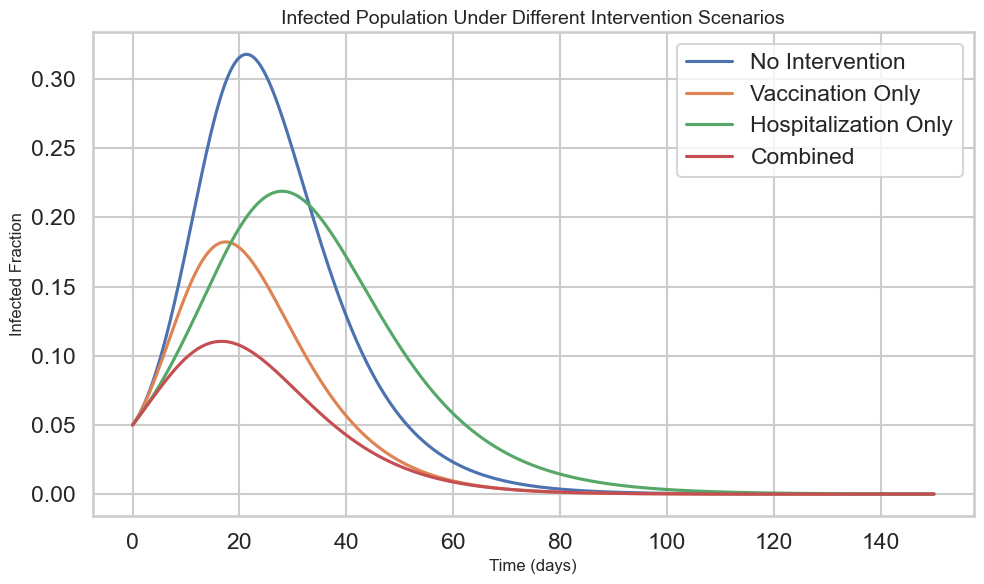

In [15]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# SEIR model
def seir_model(y, t, beta, sigma, gamma, u_func, h_func):
    s, e, i, r = y
    u_t = u_func(t)
    h_t = h_func(t)
    dsdt = -(beta - h_t) * s * i - u_t * s
    dedt = (beta - h_t) * s * i - sigma * e
    didt = sigma * e - gamma * i
    drdt = gamma * i + u_t * s
    return [dsdt, dedt, didt, drdt]

# Control functions
def u_control(t, u_max, t_delay_u):
    return u_max if t >= t_delay_u else 0

def h_control(t, h_max, t_delay_h):
    return h_max if t >= t_delay_h else 0

# Simulation function
def run_simulation(params, T, y0, scenario):
    t = np.linspace(0, T, 1000)
    if scenario == 'no_intervention':
        u_func = lambda t: u_control(t, 0, 0)
        h_func = lambda t: h_control(t, 0, 0)
    elif scenario == 'vaccination_only':
        u_func = lambda t: u_control(t, params['u_max'], 0)
        h_func = lambda t: h_control(t, 0, 0)
    elif scenario == 'hospitalization_only':
        u_func = lambda t: u_control(t, 0, 0)
        h_func = lambda t: h_control(t, params['h_max'], 0)
    else:  # combined
        u_func = lambda t: u_control(t, params['u_max'], 0)
        h_func = lambda t: h_control(t, params['h_max'], 0)
    
    sol = odeint(seir_model, y0, t, args=(params['beta'], params['sigma'], 
                                          params['gamma'], u_func, h_func))
    return t, sol.T[2]  # Return time and infected population

# Parameters
params = {
    'beta': 0.5, 'sigma': 0.2, 'gamma': 0.1,
    'u_max': 0.05, 'h_max': 0.2
}
y0 = [0.90, 0.05, 0.05, 0.0]
T = 150

# Run simulations for each scenario
scenarios = ['no_intervention', 'vaccination_only', 'hospitalization_only', 'combined']
results = {}
for scenario in scenarios:
    t, i = run_simulation(params, T, y0, scenario)
    results[scenario] = (t, i)

# Plot
plt.figure(figsize=(10, 6))
for scenario, (t, i) in results.items():
    label = scenario.replace('_', ' ').title()
    plt.plot(t, i, label=label)
plt.xlabel('Time (days)')
plt.ylabel('Infected Fraction')
plt.title('Infected Population Under Different Intervention Scenarios')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()